<a href="https://colab.research.google.com/github/SawsanYusuf/Stroke-Prediction-using-Machine-Learning-Methods/blob/main/Stroke_Prediction_using_Machine_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem

We need to Build a model to predict whether a patient is likely to get a stroke based on the input parameters like gender, age, heart disease, and smoking status. 

Each row in the data provides relevant information about the patient.

#Variables Description

###The dataset contains the following features:

id: unique identifier

gender: "Male", "Female" or "Other".

age: age of the patient.

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.

ever_married: "No" or "Yes".

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed".

Residence_type: "Rural" or "Urban".

avg_glucose_level: average glucose level in blood.

bmi: body mass index.

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*.

stroke: 1 if the patient had a stroke or 0 if not.

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

#Data Understanding

##Import Necessary Libraries

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [40]:
import io
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from imblearn.over_sampling import RandomOverSampler

from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.metrics import jaccard_score, f1_score, log_loss
from  io import StringIO
import matplotlib.image as mpimg
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore')

##Upload The Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
#Read the csv file 
df = pd.read_csv(io.BytesIO(uploaded["healthcare-dataset-stroke-data.csv"]))
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#Data Cleaning

In [ ]:
#Missing values
df.isnull().sum() / len(df)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
df[df.duplicated(keep='first')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
for i in cat_cols:
    print(f'Values in {i} \n{df[i].value_counts()}\n---')

Values in gender 
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
---
Values in hypertension 
0    4612
1     498
Name: hypertension, dtype: int64
---
Values in heart_disease 
0    4834
1     276
Name: heart_disease, dtype: int64
---
Values in ever_married 
Yes    3353
No     1757
Name: ever_married, dtype: int64
---
Values in work_type 
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
---
Values in Residence_type 
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
---
Values in smoking_status 
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
---


In [ ]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

In [ ]:
age_group=[]
for i in df['age']:
    if i<2.0:
        age_group.append('Toddler')
    elif i>2.0 and i<=19.0:
        age_group.append('Teen')
    elif i>19.0 and i<60.0:
        age_group.append('Adult')
    else:
        age_group.append('Senior')
df['age_group']=age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


#Data Visualization

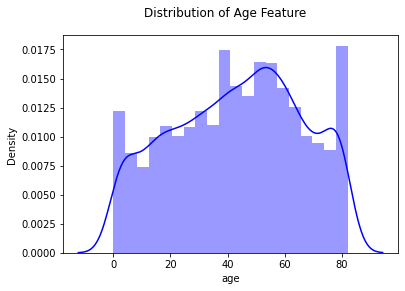

In [ ]:
plt.suptitle("Distribution of Age Feature")
sns.distplot(df.age, color='b');

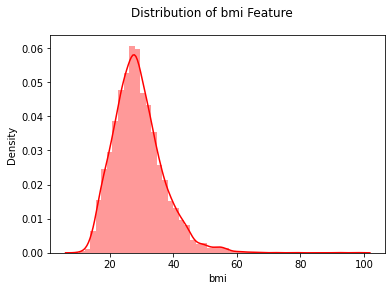

In [ ]:
plt.suptitle("Distribution of bmi Feature")
sns.distplot(df.bmi, color='r');

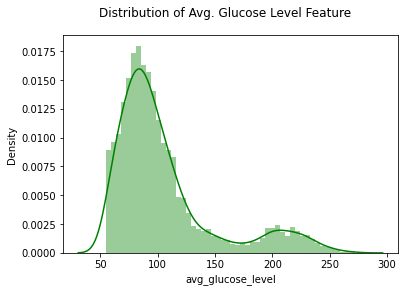

In [ ]:
plt.suptitle("Distribution of Avg. Glucose Level Feature")
sns.distplot(df.avg_glucose_level, color='g');

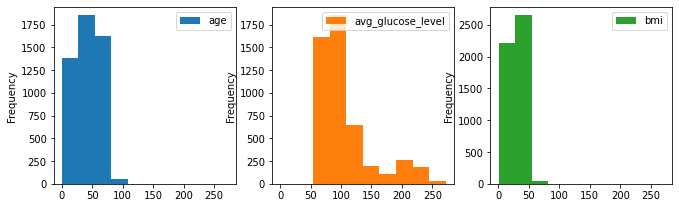

In [ ]:
#Box and Whisker Plots
df.select_dtypes("float").plot(kind='hist', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

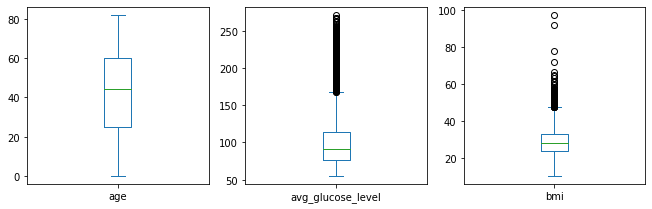

In [ ]:
#Box and Whisker Plots
df.select_dtypes("float").plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

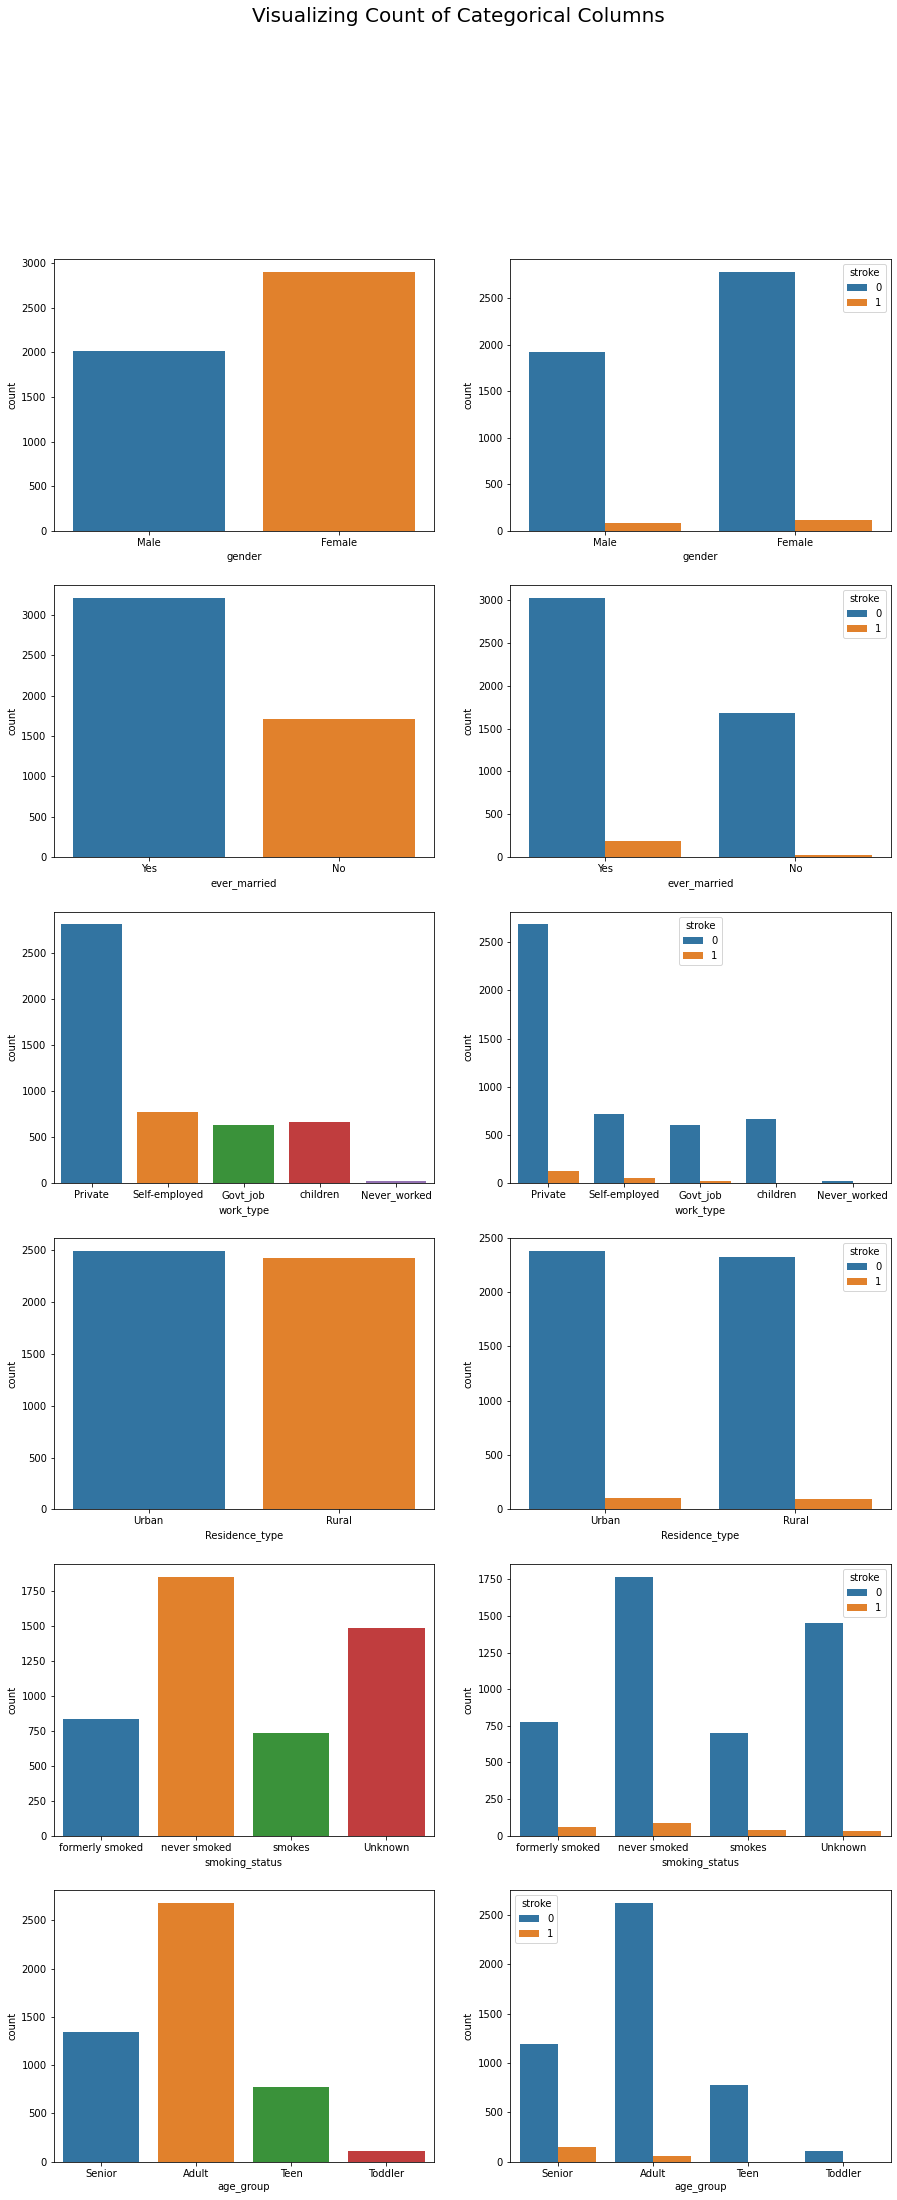

In [ ]:
fig,ax=plt.subplots(6,2,figsize=(15,35))
for index,i in enumerate(df.select_dtypes("object")):
    plt.suptitle("Visualizing Count of Categorical Columns",size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='stroke')

Check The Class Balance

In [ ]:
df["stroke"].value_counts(normalize=True)

0    0.957416
1    0.042584
Name: stroke, dtype: float64

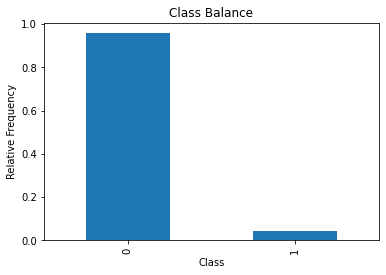

In [ ]:
# Plot class balance
df["stroke"].value_counts(normalize=True).plot(
kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance");

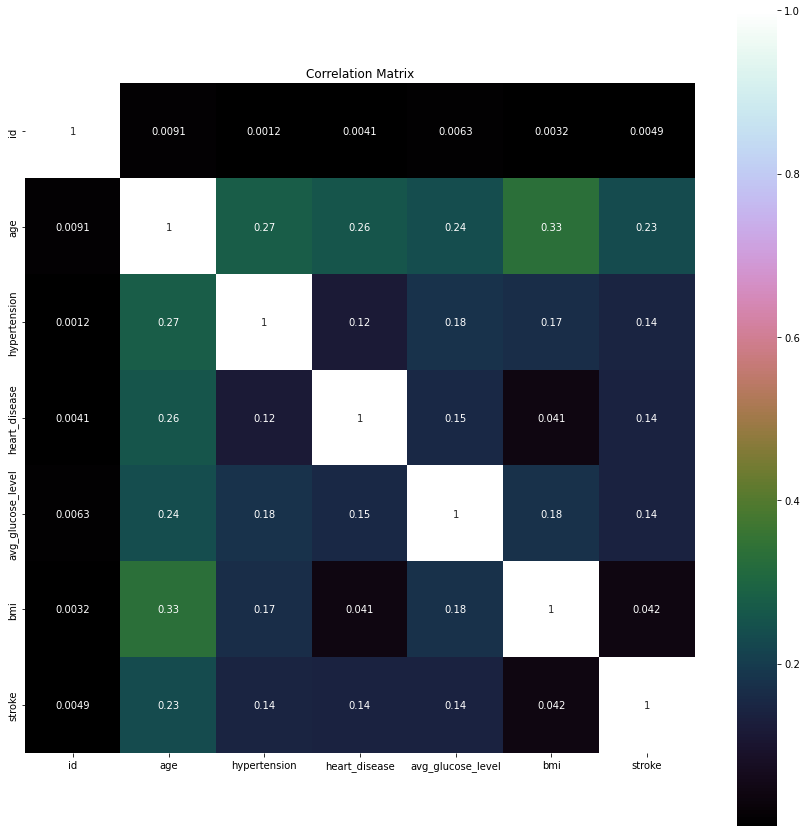

In [ ]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

#Split

In [ ]:
df =df.drop(['id','age_group'],axis=1)
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,NaN,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
target = "stroke"
X = df.drop(columns= target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4908, 18)
y shape: (4908,)


##Resampling

In [31]:
over_sampler = RandomOverSampler(random_state=42)
X_over, y_over = over_sampler.fit_resample(X, y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7776, 10)
y_train shape: (7776,)
X_test shape: (1944, 10)
y_test shape: (1944,)


#Classification

##Baseline

In [33]:
acc_baseline = y_train. value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.5


##Decision Tree

[0.77109053 0.77109053 0.78420782 0.79488169 0.81417181 0.82908951
 0.85378086 0.86638374 0.88001543]

[0.78446502 0.78446502 0.80298354 0.81121399 0.82613169 0.84002058
 0.86162551 0.87037037 0.88271605]
The best train accuracy was with 0.8800154320987654 with d= 9
The best test accuracy was with 0.8827160493827161 with d= 9


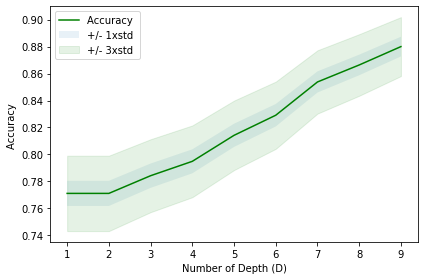

The best accuracy was with 0.8800154320987654 with d= 9


In [72]:
Ds = 10
train_acc = np.zeros((Ds-1))
test_acc =  np.zeros((Ds-1))
std_acc =   np.zeros((Ds-1))

for n in range(1,Ds):   
                                                                                                                                                     #Train Model and Predict  
    tree = make_pipeline(OneHotEncoder(use_cat_names=True),
                         SimpleImputer(strategy = "median"),
                         DecisionTreeClassifier(criterion="entropy", max_depth = n)
                         )

    tree.fit(X_train, y_train)
    yhat = tree.predict(X_test)
    train_acc[n-1] = metrics.accuracy_score(y_train, tree.predict(X_train)) 
    test_acc[n-1] =  metrics.accuracy_score(y_test,  yhat) 
    std_acc[n-1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])
    
print(train_acc)
print()
print(test_acc)

print( "The best train accuracy was with", train_acc.max(), "with d=", train_acc.argmax()+1) 
print( "The best test accuracy was with", test_acc.max(), "with d=", test_acc.argmax()+1) 
    
plt.plot(range(1,Ds),train_acc,'g')
plt.fill_between(range(1,Ds),train_acc - 1 * std_acc,train_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ds),train_acc - 3 * std_acc,train_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Depth (D)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", train_acc.max(), "with d=", train_acc.argmax()+1)

In [74]:
modelTree =make_pipeline(OneHotEncoder(use_cat_names=True),
                         SimpleImputer(strategy = "median"),
                         DecisionTreeClassifier(criterion="entropy", max_depth = 9)
                         )

modelTree.fit(X_train,y_train)
predTree = modelTree.predict(X_test)

print(predTree[0:5])
print(y_test[0:5])

print (classification_report(y_test, predTree))
Df1 = f1_score(y_test, predTree, average='weighted')
Djs = jaccard_score(y_test, predTree)
Dll = log_loss(y_test, predTree)

print("DecisionTrees's Train set Accuracy: ",   metrics.accuracy_score(y_train, modelTree.predict(X_train)))
print("DecisionTrees's Test Accuracy: ",          metrics.accuracy_score(y_test,  predTree))
print("Avg F1-score: %.4f" %   Df1)
print("Jaccard Score: %.4f" %   Djs)
print("LogLoss: %.2f" % Dll)

[0 0 0 0 1]
251     0
4961    0
3465    0
2755    0
6963    1
Name: stroke, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       976
           1       0.84      0.94      0.89       968

    accuracy                           0.88      1944
   macro avg       0.89      0.88      0.88      1944
weighted avg       0.89      0.88      0.88      1944

DecisionTrees's Train set Accuracy:  0.8804012345679012
DecisionTrees's Test Accuracy:  0.8827160493827161
Avg F1-score: 0.8824
Jaccard Score: 0.7993
LogLoss: 4.05


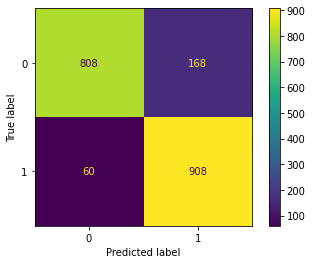

In [75]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(modelTree, X_test, y_test);

##Logistic Regression

In [48]:
#X_train, X_test, y_train, y_test = train_test_split( X_over, y_over, test_size=0.2, random_state=4)
model_LR = make_pipeline(OneHotEncoder(use_cat_names=True),
                         SimpleImputer(strategy = "median"),
                         LogisticRegression(C=0.01, solver='sag')
                         )
model_LR.fit(X_train,y_train)
model_LR
yhat_LR = model_LR.predict(X_test)
print(yhat_LR[0:5])
print(y_test[0:5])

[0 0 0 0 0]
251     0
4961    0
3465    0
2755    0
6963    1
Name: stroke, dtype: int64


In [49]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_LR.predict(X_train)))
print("Test set Accuracy: ",  metrics.accuracy_score(y_test,  yhat_LR))
yhat_LR_prob = model_LR.predict_proba(X_test)

print (classification_report(y_test, yhat_LR))
Lf1 = f1_score(y_test, yhat_LR, average='weighted')
Ljs = jaccard_score(y_test, yhat_LR)
LL = log_loss(y_test, yhat_LR_prob)
print ("LogLoss: : %.2f" % LL)
print ("f1 score: : %.2f" % Lf1)
print ("jaccard core: : %.2f" % Ljs)

Train set Accuracy:  0.7601594650205762
Test set Accuracy:  0.7741769547325102
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       976
           1       0.74      0.83      0.79       968

    accuracy                           0.77      1944
   macro avg       0.78      0.77      0.77      1944
weighted avg       0.78      0.77      0.77      1944

LogLoss: : 0.49
f1 score: : 0.77
jaccard core: : 0.65


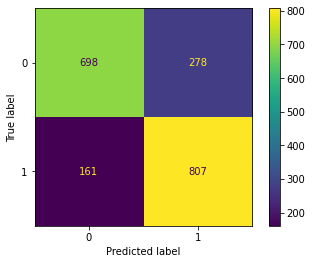

In [50]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_LR, X_test, y_test);

##K Nearest Neighbor(KNN)

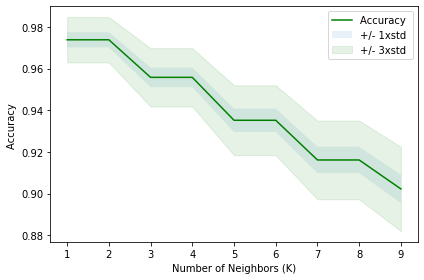

The best accuracy was with 0.9737654320987654 with k= 1


In [69]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = make_pipeline(OneHotEncoder(use_cat_names=True),
                          SimpleImputer(strategy = "median"),
                          KNeighborsClassifier(n_neighbors = n)
                          )
    neigh.fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [70]:
#training the model with the best value of k
k = 1
Model_2 = make_pipeline(OneHotEncoder(use_cat_names=True),
                        SimpleImputer(strategy = "median"),
                        KNeighborsClassifier(n_neighbors = k)
                        )

Model_2.fit(X_train, y_train)
yhat=Model_2.predict(X_test)

#Accuracy evaluation
print (classification_report(y_test, yhat))
Ka = f1_score(y_test, yhat, average='weighted')
Kb = jaccard_score(y_test, yhat)
kc = log_loss(y_test, yhat)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Model_2.predict(X_train)))
print("Test set Accuracy: ",  metrics.accuracy_score(y_test,  yhat))
print("Avg F1-score: %.4f" %   Ka)
print("Jaccard Score: %.4f" %   Kb)
print ("LogLoss: : %.2f" %  kc)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       976
           1       0.95      1.00      0.97       968

    accuracy                           0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.98      0.97      0.97      1944

Train set Accuracy:  1.0
Test set Accuracy:  0.9737654320987654
Avg F1-score: 0.9738
Jaccard Score: 0.9500
LogLoss: : 0.91


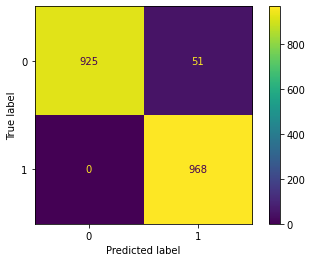

In [71]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(Model_2, X_test, y_test);

##Support Vector Machine (SVM)

In [55]:
y = np.asarray(df['stroke'])
#X_train, X_test, y_train, y_test = train_test_split( X_over, y_over, test_size=0.2, random_state=4)
clf = make_pipeline(OneHotEncoder(use_cat_names=True),
                    SimpleImputer(strategy = "median"), 
                    SVC(kernel='rbf')
                    )
clf.fit(X_train, y_train)
pr_svm = clf.predict(X_test)
pr_svm

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ",  metrics.accuracy_score(y_test,  pr_svm))
print (classification_report(y_test, pr_svm))

svm_f1 = f1_score(y_test, pr_svm, average='weighted')
svm_js = jaccard_score(y_test, pr_svm,pos_label=1)
svm_log= log_loss(y_test, pr_svm)
print("Avg F1-score: %.4f" % svm_f1)
print("Jaccard score: %.4f" % svm_js)
print("LogLoss: %.4f", log_loss(y_test, pr_svm))

Train set Accuracy:  0.7565586419753086
Test set Accuracy:  0.7736625514403292
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       976
           1       0.74      0.83      0.79       968

    accuracy                           0.77      1944
   macro avg       0.78      0.77      0.77      1944
weighted avg       0.78      0.77      0.77      1944

Avg F1-score: 0.7730
Jaccard score: 0.6463
LogLoss: %.4f 7.817532048689009


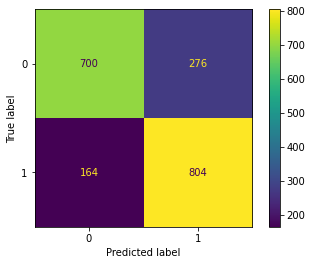

In [67]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

#Model Evaluation

In [77]:
df_R= {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'], 
          'Jaccard':    [Kb, Djs, svm_js, Ljs],
          'F1-Score':  [Ka, Df1, svm_f1, Lf1],
          'LogLoss':    [kc ,Dll , svm_log, LL]}

Report_Df = pd.DataFrame(df_R)
Report_Df.index = Report_Df['Algorithm']
Report_Df.drop(Report_Df.columns[0], axis=1, inplace=True)
Report_Df

,Jaccard,F1-Score,LogLoss
Algorithm,,,
KNN,0.949951,0.973750,0.906131
Decision Tree,0.799296,0.882380,4.050913
SVM,0.646302,0.772963,7.817532
LogisticRegression,0.647673,0.773412,0.488518
